<h1>Trabajo Muestreo-Interferencia</h1>
<!----Hey hey!!!---->

<h2>Asignatura: Estadistica 2</h2>

<h3>Profesor: Carlos Alfonso Mantilla Duarte
<br>
Grupo: F1</h3>

<h4>Andrés Felipe Uribe García - 2160793
<br>Julián Orlando Rodríguez Villamizar - 2170137
<br>Isabel Cristina Gómez Balvin - 2171895 </h4>

   1. Realice muestreo aleatorio simple y realice las estimaciones (inferencia) correspondientes. Tenga en cuenta que son múltiples variables
   2.  Realice los correspondientes muestreos estratificados y compare los resultados con los anteriores. Explique las diferencias y/o similitudes
   3.  Realice los correspondientes muestreos por conglomerados y compare los resultados con los puntos 1 y 2. Explique las diferencias y/o similitudes
   4.  ¿Considera que es procedente realizar un muestreo sistemático? Argumente su respuesta
    Si la respuesta del punto 4 fue positiva, realice el correspondiente muestreo y compare con los anteriores
   5.  Para las estimaciones emplee los siguientes niveles de confianza: 90%, 95% y 99%.

In [1]:
install.packages('samplingbook')
library(samplingbook)
library('SamplingUtil')
library(dplyr)
library(magrittr)
install.packages("bbmle")
library(bbmle)
install.packages("stats4")
library(stats4)
install.packages('rafalib')
library(rafalib)
load('saberpro.RData')
ls() 
dim(sp161718)

Installing package into 'C:/Users/ANDRESURIBE/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'samplingbook' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ANDRESURIBE\AppData\Local\Temp\RtmpOmydaU\downloaded_packages


Loading required package: pps

Loading required package: sampling

Loading required package: survey

Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: 'survival'


The following objects are masked from 'package:sampling':

    cluster, strata



Attaching package: 'survey'


The following object is masked from 'package:graphics':

    dotchart



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Installing package into 'C:/Users/ANDRESURIBE/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'bbmle' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ANDRESURIBE\AppData\Local\Temp\RtmpOmydaU\downloaded_packages


Loading required package: stats4


Attaching package: 'bbmle'


The following object is masked from 'package:dplyr':

    slice


Warning message:
"package 'stats4' is in use and will not be installed"
Installing package into 'C:/Users/ANDRESURIBE/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'rafalib' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ANDRESURIBE\AppData\Local\Temp\RtmpOmydaU\downloaded_packages


[1] "sp161718"

[1] 725295     16

In [2]:
mystats <- function(x, na.omit=FALSE){
  if (na.omit)
  x <- x[!is.na(x)]
  m <- mean(x)
  n <- length(x)
  s <- sd(x)
  v <-var(x)
  #skew <- sum((x-m)^3/s^3)/n
  #kurt <- sum((x-m)^4/s^4)/n - 3
  return(c("Tamaño"=n, "Media"=m, "Desviación Estándar"=s, "Varianza"=v#, "simetría"=skew#, "kurtosis"=kurt#
           ))
}

In [3]:
Datos<-get(load("saberpro.RData"))

In [4]:
head(Datos); tail(Datos)

,periodo,apli_consecutivo,estu_depto_reside,estu_cod_reside_depto,inst_cod_institucion,inst_nombre_institucion,raz_cuant_punt,raz_cuant_des,lect_crit_punt,lect_crit_des,comp_ciud_punt,comp_ciud_des,ingles_punt,ingles_desem,comu_escr_punt,comu_escr_des
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>
1,20163,EK201630062726,ATLANTICO,8,1202,UNIVERSIDAD DEL ATLANTICO-BARRANQUILLA,160,3,130,2,167,3,160,A2,155,3
2,20163,EK201630208121,CUNDINAMARCA,25,2725,POLITECNICO GRANCOLOMBIANO-BOGOTÃ D.C.,138,2,132,2,77,1,125,A1,164,3
3,20163,EK201630220210,CALDAS,17,2829,CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIMINUTO-BOGOTÃ D.C.,146,2,157,2,150,2,104,A1-,122,2
4,20163,EK201630180243,MAGDALENA,47,10413,IED ESCUELA NORMAL SUPERIOR MARÃA AUXILIADORA - SEDE PRINCIPAL-SANTA MARTA,160,3,172,3,151,2,160,A2,192,4
5,20163,EK201630225077,CORDOBA,23,1113,UNIVERSIDAD DE CORDOBA-MONTERIA,130,2,122,1,144,2,192,B1,131,2
6,20163,EK201630189735,CAUCA,19,1807,UNIVERSIDAD LIBRE-CALI,159,3,129,2,147,2,108,A1-,154,3


,periodo,apli_consecutivo,estu_depto_reside,estu_cod_reside_depto,inst_cod_institucion,inst_nombre_institucion,raz_cuant_punt,raz_cuant_des,lect_crit_punt,lect_crit_des,comp_ciud_punt,comp_ciud_des,ingles_punt,ingles_desem,comu_escr_punt,comu_escr_des
,<int>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>
725290,20183,EK201830220242,VALLE,76,2114,ESCUELA NACIONAL DEL DEPORTE-CALI,125,1,111,1,100,1,134,A1,140,2
725291,20183,EK201830103468,SANTANDER,68,2847,"CORPORACION UNIVERSITARIA DE INVESTIGACION Y DESARROLLO -""UDI""-BUCARAMANGA",182,3,145,2,152,2,167,A2,154,3
725292,20183,EK201830186897,BOGOTA,11,9104,"ESCUELA MILITAR DE CADETES ""GENERAL JOSE MARIA CORDOVA""-BOGOTÃƒÂ D.C.",149,2,129,2,110,1,168,A2,122,2
725293,20183,EK201830155382,SANTANDER,68,2207,INSTITUTO UNIVERSITARIO DE LA PAZ-BARRANCABERMEJA,185,3,173,3,190,3,148,A2,178,3
725294,20183,EK201830225312,,NA,1201,UNIVERSIDAD DE ANTIOQUIA-MEDELLIN,179,3,165,3,192,3,156,A2,150,3
725295,20183,EK201830039482,SUCRE,70,2823,CORPORACION UNIVERSITARIA DEL CARIBE - CECAR-SINCELEJO,135,2,122,1,99,1,132,A1,138,2


<h2>Definición de los datos</h2>

In [5]:
#Rellenamos los espacios faltantes con su media correspondiente
#pues de omitirlos podriamos perder informacion importante
R<-data.frame(C=Datos$estu_cod_reside_depto,
                RC=Datos$raz_cuant_punt,
                LC=Datos$lect_crit_punt,
                CC=Datos$comp_ciud_punt,
                I=Datos$ingles_punt,
                CE=Datos$comu_escr_punt,
                P=Datos$periodo,
                D=Datos$estu_depto_reside)

sum(is.na(R$C))
#sum(is.na(P$RC))
#sum(is.na(P$LC))
#sum(is.na(P$CC))
#sum(is.na(P$I))
sum(is.na(R$CE))
#sum(is.na(P$P))
#sum(is.na(P$D))

datoslimpios = na.omit(R)

MCE = round(mean(datoslimpios$CE))
MC = round(mean(datoslimpios$C))
R$CE[is.na(R$CE)] = MCE
R$C[is.na(R$C)] = MC

sum(is.na(R$CE))
sum(is.na(R$C))


[1] 1997

[1] 22114

[1] 0

[1] 0

In [6]:
PT<-data.frame(C=R$C,
               T=(R$RC + R$LC + R$CC + R$I + R$CE)/5, # Global
                RC=R$RC,
                LC=R$LC,
                CC=R$CC,
                I=R$I,
                CE=R$CE,
                P=R$P,
                D=R$D)

In [7]:
pop<-round(mystats(PT[,'T']),1)
data.frame(pop)

,pop
,<dbl>
Tamaño,725295.0
Media,149.0
Desviación Estándar,23.0
Varianza,528.3


<h3>Tamaño adecuado de la muestra</h3>

In [8]:
#c("tamaño"=n, "media"=m, "desviación estándar"=s)
#error del 5%
m=pop['Media'] 
s=pop['Desviación Estándar'] #Desviación Estandar
e=0.05*m #Error * Media
sample.size.mean(e,s, level = 0.90)
e=0.03*m #Error * Media
sample.size.mean(e,s, level = 0.95)
e=0.01*m #Error * Media
sample.size.mean(e,s, level = 0.99)


sample.size.mean object: Sample size for mean estimate
Without finite population correction: N=Inf, precision e=7.45 and standard deviation S=23

Sample size needed: 26



sample.size.mean object: Sample size for mean estimate
Without finite population correction: N=Inf, precision e=4.47 and standard deviation S=23

Sample size needed: 102



sample.size.mean object: Sample size for mean estimate
Without finite population correction: N=Inf, precision e=1.49 and standard deviation S=23

Sample size needed: 1581


In [9]:
#Creamos las muestras
n1<-26
Rf1<- sample(1:nrow(PT),size=n1,replace=FALSE)
n2<-102
Rf2<- sample(1:nrow(PT),size=n2,replace=FALSE)
n3<-1581
Rf3<- sample(1:nrow(PT),size=n3,replace=FALSE)

<h1>1- Muestreo Simple</h1>
<H4>Total vs Razonamiento cuantitativo - Inglés - Lectura Crítica</H4>

<h3>Primer Muestreo N = 26</h3>
Nivel de confianza del $90\%$
Error del $5\%$

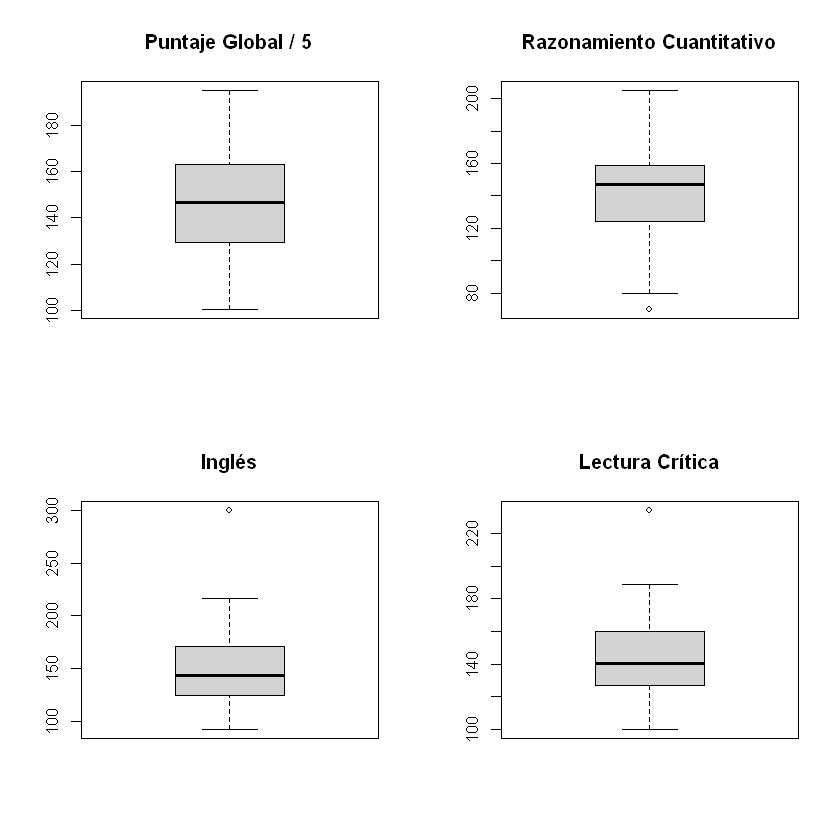

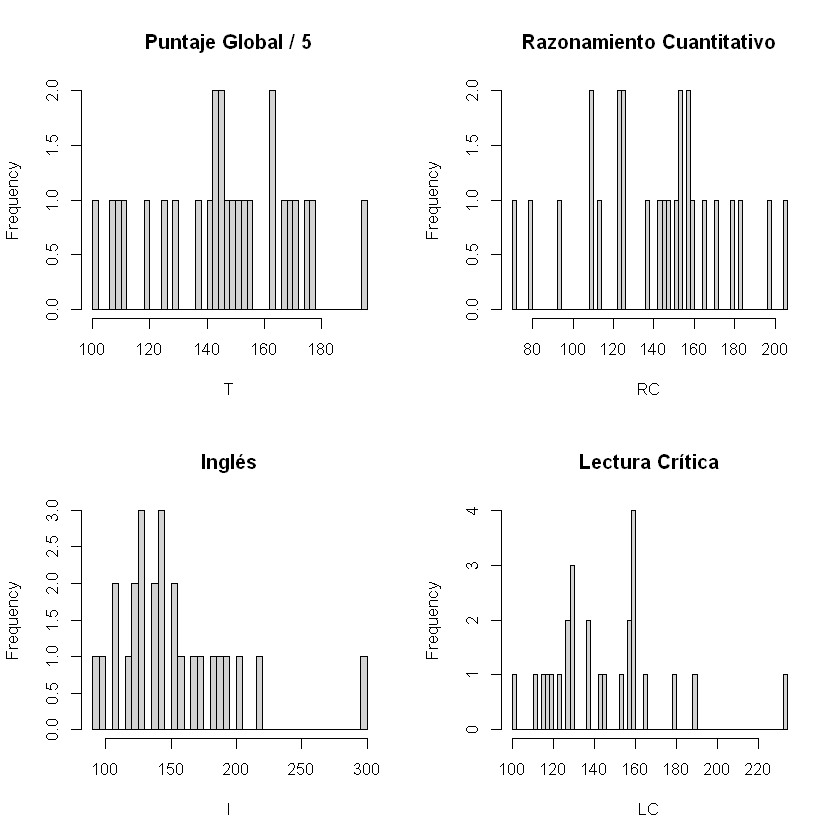

In [10]:
par(mfrow=c(2,2))

with(PT[Rf1,], boxplot(T, main = 'Puntaje Global / 5'))
with(PT[Rf1,], boxplot(RC, main = 'Razonamiento Cuantitativo'))
with(PT[Rf1,], boxplot(I, main = 'Inglés'))
with(PT[Rf1,], boxplot(LC, main = 'Lectura Crítica'))

with(PT[Rf1,], hist(T, nclass = 50, main = 'Puntaje Global / 5'))
with(PT[Rf1,], hist(RC, nclass = 50, main = 'Razonamiento Cuantitativo'))
with(PT[Rf1,], hist(I, nclass = 50, main = 'Inglés'))
with(PT[Rf1,], hist(LC, nclass = 50, main = 'Lectura Crítica'))
par(mfrow=c(1,1))

<h3>Segundo Muestreo N = 102</h3>
Nivel de confianza del $95\%$
Error del $3\%$

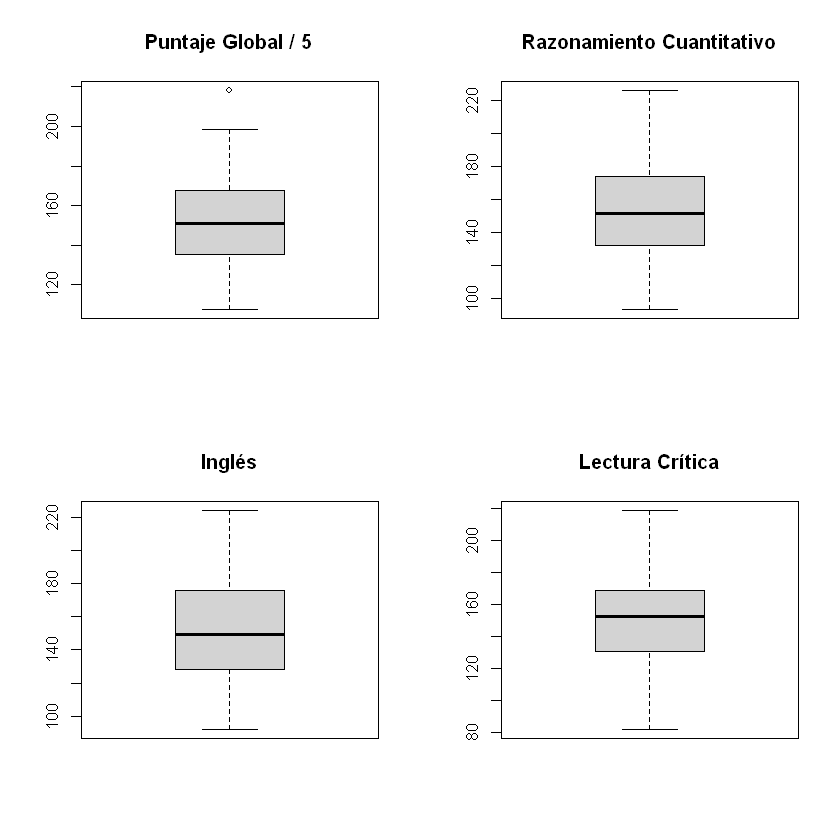

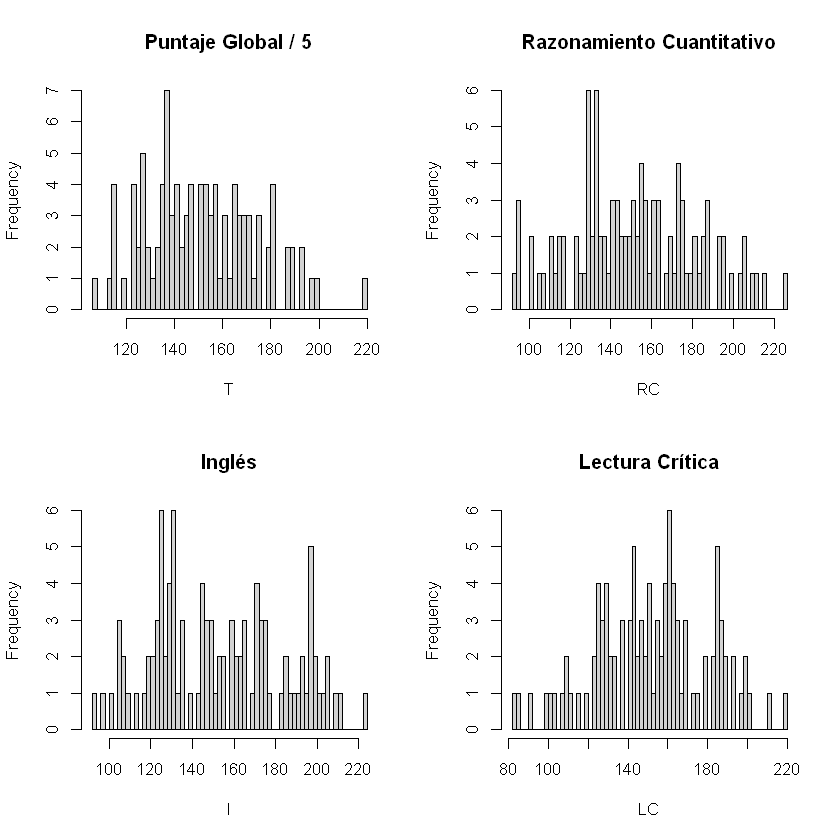

In [11]:
par(mfrow=c(2,2))
with(PT[Rf2,], boxplot(T, main = 'Puntaje Global / 5'))
with(PT[Rf2,], boxplot(RC, main = 'Razonamiento Cuantitativo'))
with(PT[Rf2,], boxplot(I, main = 'Inglés'))
with(PT[Rf2,], boxplot(LC, main = 'Lectura Crítica'))
with(PT[Rf2,], hist(T, nclass = 50, main = 'Puntaje Global / 5'))
with(PT[Rf2,], hist(RC, nclass = 50, main = 'Razonamiento Cuantitativo'))
with(PT[Rf2,], hist(I, nclass = 50, main = 'Inglés'))
with(PT[Rf2,], hist(LC, nclass = 50, main = 'Lectura Crítica'))
par(mfrow=c(1,1))

<h3>Tercer Muestreo N = 1581</h3>
Nivel de confianza del $99\%$
Error del $1\%$

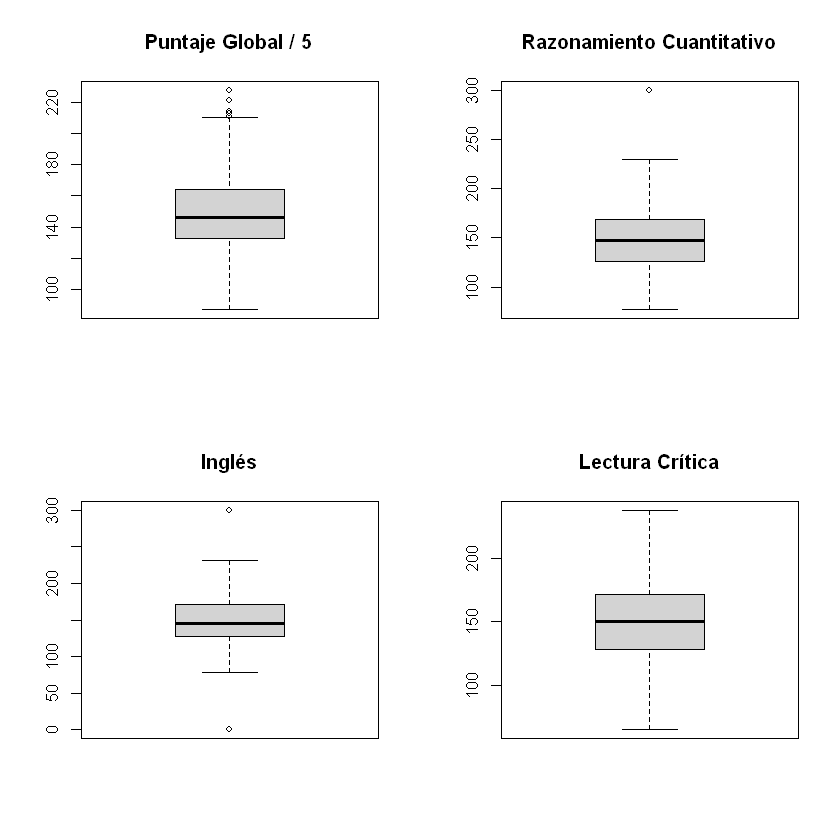

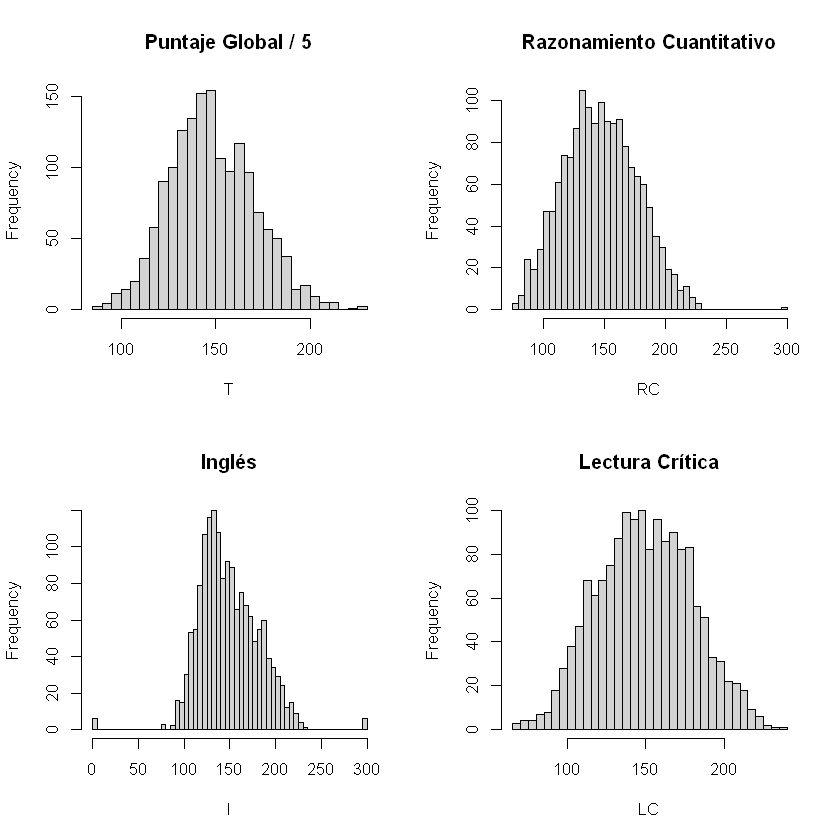

In [12]:
par(mfrow=c(2,2))
with(PT[Rf3,], boxplot(T, main = 'Puntaje Global / 5'))
with(PT[Rf3,], boxplot(RC, main = 'Razonamiento Cuantitativo'))
with(PT[Rf3,], boxplot(I, main = 'Inglés'))
with(PT[Rf3,], boxplot(LC, main = 'Lectura Crítica'))
with(PT[Rf3,], hist(T, nclass = 50, main = 'Puntaje Global / 5'))
with(PT[Rf3,], hist(RC, nclass = 50, main = 'Razonamiento Cuantitativo'))
with(PT[Rf3,], hist(I, nclass = 50, main = 'Inglés'))
with(PT[Rf3,], hist(LC, nclass = 50, main = 'Lectura Crítica'))
par(mfrow=c(1,1))

### Inferencia

Para este caso comparamos 3 variables; Razonamiento cuantitativo, inglés, Lectura Crítica contra a una cuarta creada para entrar en contexto la cual es "Puntaje Global" definida como la suma de todas las variables cuantitativas divididas por 5

Las gráficas las creamos tomando 3 tamaños de muestra distintos el primero N1 = 26, N2=102 y N3 = 1581, variando los niveles de confianza en 90%, 95% y 99% y el error en 5%, 3% y 1%.

Podemos apreciar que el primer y segundo muestreo, resultaban deficientes al no permitir apreciar con un nivel de detalle adecuado el comportamiento de los datos, mientras que el valor N3 no dista de los resultados obtenidos de la población total a un menor costo computacional.

De los resultados obtenidos podemos apreciar que la asignatura ingles representa un mayor reto para la mayoría de los estudiantes teniendo un pico mucho más pronunciado hacia los 120 pts y decayendo con una pendiente mayor hacia los puntajes más altos, a diferencia de Razonamiento Cuantitativo y Lectura crítica que pueden ser fácilmente modeladas por una distribución normal


<h1>2- Muestreo Estratificado</h1>

<H4>Las variables a usar para la estratificacion periodo</H4>

In [13]:
#install.packages('plyr')
library(magrittr) # Permite leer la función %>%
library(dplyr)

In [14]:
Estratificacion<- PT %>%
                  select(P,T)%>%
                  group_by(P) %>%
                  summarise(n=n(),
                            s=sd(T)) %>%
                  mutate(p=n/sum(n))

Estratificacion

`summarise()` ungrouping output (override with `.groups` argument)



P,n,s,p
<int>,<int>,<dbl>,<dbl>
20162,1308,18.34751,0.0018034041
20163,241320,22.54866,0.3327197899
20172,1408,21.45691,0.0019412791
20173,244158,23.28049,0.3366326805
20182,1527,22.86895,0.0021053502
20183,235201,22.95642,0.3242832227
20184,373,21.43232,0.0005142735


In [15]:
#Para este caso se ha decido solo usar la muestra N=1581 al a ver demostrado 
# ser suficiente en el muestreo simple
nsizeProp1581<-nstrata(n=1581,wh=Estratificacion[,4],method="proportional")

In [16]:
data.frame(periodo=Estratificacion$P,nsizeProp1581)

periodo,p
<int>,<dbl>
20162,3
20163,527
20172,4
20173,533
20182,4
20183,513
20184,1


tenemos las proporciones y con ellas vamos a relizar las respectivas muestras simples 

In [17]:
#Muestras 1581
m621581<-sample(1:nrow(PT[Estratificacion$P=='20162']),3,replace=FALSE)
m631581<- sample(1:nrow(PT[Estratificacion$P=='20163']),527,replace=FALSE)
m721581<- sample(1:nrow(PT[Estratificacion$P=='20172',]),4,replace=FALSE)
m731581<- sample(1:nrow(PT[Estratificacion$P=='20173',]),533,replace=FALSE)
m821581<- sample(1:nrow(PT[Estratificacion$P=='20182',]),4,replace=FALSE)
m831581<- sample(1:nrow(PT[Estratificacion$P=='20182',]),513,replace=FALSE)
m841581<- sample(1:nrow(PT[Estratificacion$P=='20182',]),4,replace=FALSE)

ya tenemos todas nuestras muestras, ahora haremos un vector que las contenga


In [18]:
ME1581<-c(m621581,m631581,m721581,m731581,m821581,m831581,m841581)

In [19]:
tail(ME1581)
head(PT[ME1581,])

[1] 103121  27916  74966  85303  66771  14932

,C,T,RC,LC,CC,I,CE,P,D
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>
173378,11,136.4,133,138,131,124,156,20163,BOGOTA
666640,11,167.2,174,195,154,147,166,20183,BOGOTA
243551,19,164.4,174,190,181,145,132,20173,CAUCA
634408,66,157.0,176,184,115,179,131,20183,RISARALDA
301414,11,157.6,133,143,137,226,149,20173,BOGOTA
512210,25,132.6,129,126,140,135,133,20183,CUNDINAMARCA


[1] "Muestreo Estratificado N=1581"


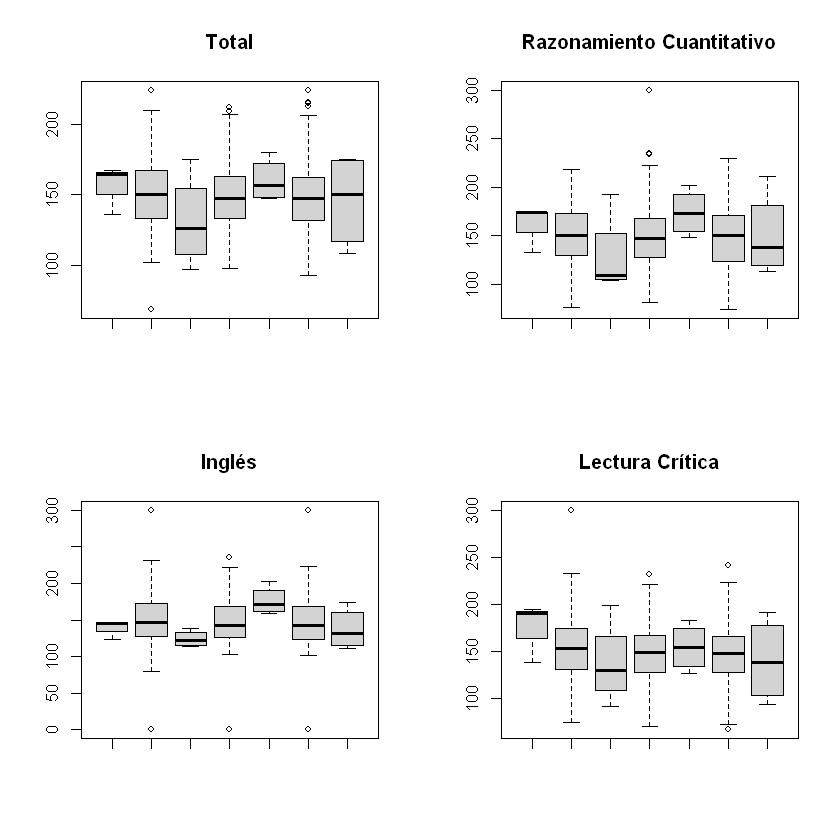

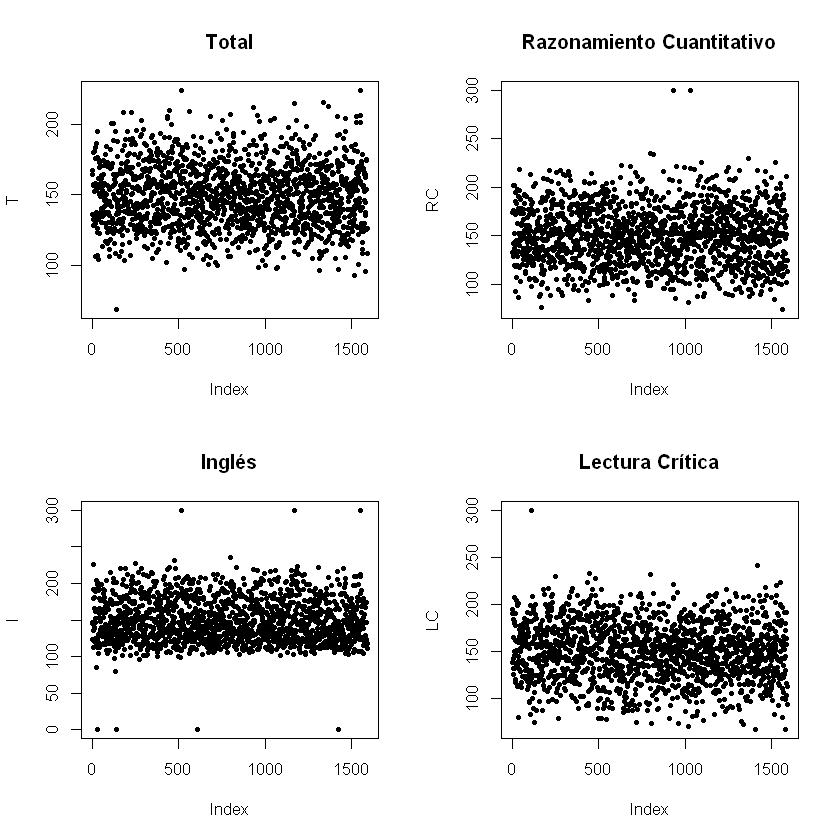

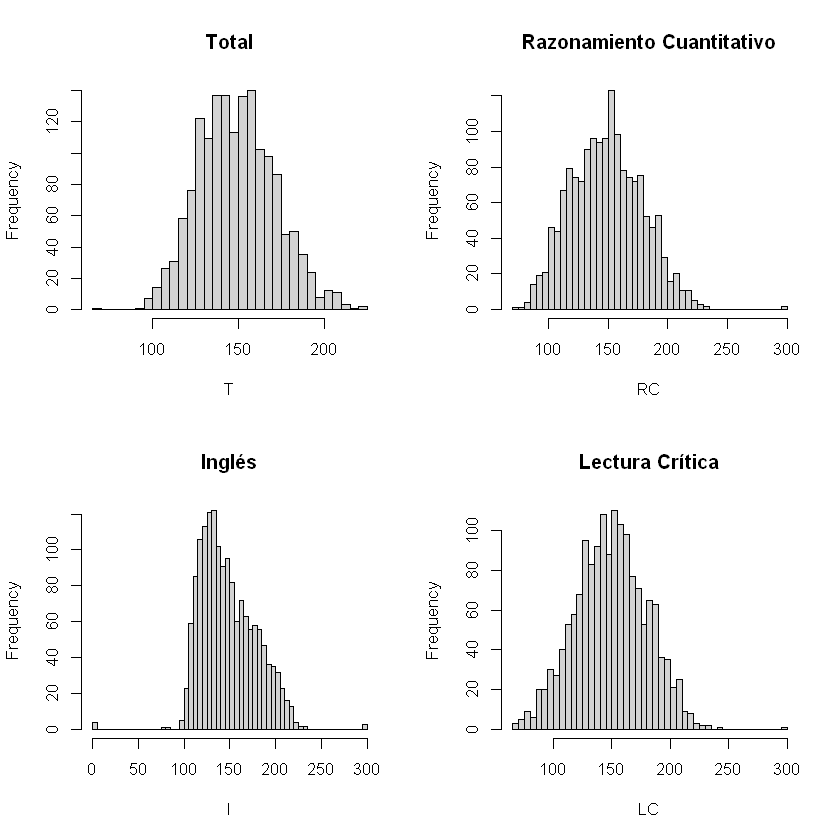

In [20]:
par(mfrow=c(2,2))
print('Muestreo Estratificado N=1581')
with(PT[ME1581,], boxplot(PT[m621581,]$T,
                          PT[m631581,]$T,
                          PT[m721581,]$T,
                          PT[m731581,]$T,
                          PT[m821581,]$T,
                          PT[m831581,]$T,
                          PT[m841581,]$T,
                          main = 'Total'))
with(PT[ME1581,], boxplot(PT[m621581,]$RC,
                          PT[m631581,]$RC,
                          PT[m721581,]$RC,
                          PT[m731581,]$RC,
                          PT[m821581,]$RC,
                          PT[m831581,]$RC,
                          PT[m841581,]$RC,
                          main = 'Razonamiento Cuantitativo'))
with(PT[ME1581,], boxplot(PT[m621581,]$I,
                          PT[m631581,]$I,
                          PT[m721581,]$I,
                          PT[m731581,]$I,
                          PT[m821581,]$I,
                          PT[m831581,]$I,
                          PT[m841581,]$I,
                          main = 'Inglés'))
with(PT[ME1581,], boxplot(PT[m621581,]$LC,
                          PT[m631581,]$LC,
                          PT[m721581,]$LC,
                          PT[m731581,]$LC,
                          PT[m821581,]$LC,
                          PT[m831581,]$LC,
                          PT[m841581,]$LC,
                          main = 'Lectura Crítica'))

with(PT[ME1581,], plot(T, pch = 20, main = 'Total'))
with(PT[ME1581,], plot(RC, pch = 20, main = 'Razonamiento Cuantitativo'))
with(PT[ME1581,], plot(I, pch = 20, main = 'Inglés'))
with(PT[ME1581,], plot(LC, pch = 20, main = 'Lectura Crítica'))

with(PT[ME1581,], hist(T, nclass = 50, main = 'Total'))
with(PT[ME1581,], hist(RC, nclass = 50, main = 'Razonamiento Cuantitativo'))
with(PT[ME1581,], hist(I, nclass = 50, main = 'Inglés'))
with(PT[ME1581,], hist(LC, nclass = 50, main = 'Lectura Crítica'))

par(mfrow=c(1,1))


### Inferencia

**La diferencia principal entre los resultados obtenidos en el Muestreo Aleatorio Simple (MAS) y el Muestreo Estratificado (ME) es que en el primero se escogía una muestra de manera aleatoria sin tener en cuenta ninguna característica de la población, y en el segundo se escogió al periodo como el respectivo estrato a seguir y se logró que todos esos estratos estuvieran representados de manera adecuada en la muestra.
Analizando las gráficas observamos que en el diagrama de cajas del MAS existe solo una caja mientras que en el del ME hay 7, cada una correspondiente a cierto periodo.**

<h1>3- Muestreo Conglomerado</h1>

In [21]:
PT$D=recode(PT$D,'NARIÃ‘O'= "NARIÑO")
PT$D=recode(PT$D,'NARIÃƒâ\200\230O'= "NARIÑO")
unique(PT[,9])

[1] ATLANTICO       CUNDINAMARCA    CALDAS          MAGDALENA      
 [5] CORDOBA         CAUCA           BOGOTA          ANTIOQUIA      
 [9] META            CESAR           VALLE           TOLIMA         
[13] BOYACA          SANTANDER       BOLIVAR                        
[17] HUILA           NORTE SANTANDER SUCRE           QUINDIO        
[21] VAUPES          RISARALDA       NARIÑO          CAQUETA        
[25] CASANARE        CHOCO           PUTUMAYO        LA GUAJIRA     
[29] GUAVIARE        ARAUCA          SAN ANDRES      VICHADA        
[33] AMAZONAS        EXTRANJERO      GUAINIA        
35 Levels:  AMAZONAS ANTIOQUIA ARAUCA ATLANTICO BOGOTA BOLIVAR ... VICHADA

In [22]:
Conglomerados<- PT %>%
  select(D,T) %>%
  group_by(D) %>%
  summarise(n=n(),
            std1=sd(T)) %>%
  mutate(p=n/sum(n))
  

head(Conglomerados[order(Conglomerados$p, decreasing = TRUE), ],6)

`summarise()` ungrouping output (override with `.groups` argument)



D,n,std1,p
<fct>,<int>,<dbl>,<dbl>
BOGOTA,210798,23.11200,0.29063760
ANTIOQUIA,86465,23.24833,0.11921356
VALLE,55996,22.86685,0.07720445
ATLANTICO,41127,23.03347,0.05670382
CUNDINAMARCA,39227,21.27240,0.05408420
SANTANDER,36348,22.17065,0.05011478


In [23]:
nsCProp100<-nstrata(n=2433,wh=Conglomerados[,4],method="proportional")
PC = data.frame(Departamento=Conglomerados$D,nsCProp100)
head(PC[order(PC$p, decreasing = TRUE),],6)

,Departamento,p
,<fct>,<dbl>
6,BOGOTA,708
3,ANTIOQUIA,291
33,VALLE,188
5,ATLANTICO,138
16,CUNDINAMARCA,132
30,SANTANDER,122


In [24]:
#la muestra real es de 1028 al reducice la cantidad de departamentos a los más relevantes
mBOGOTA<- sample(1:nrow(PT[Conglomerados$D=="BOGOTA",]),708)
mANTIOQUIA<- sample(1:nrow(PT[Conglomerados$D=="ANTIOQUIA",]),291)
mVALLE<- sample(1:nrow(PT[Conglomerados$D=="VALLE",]),188)
mATLANTICO<- sample(1:nrow(PT[Conglomerados$D=="ATLANTICO",]),138)
mCUNDINAMARCA<- sample(1:nrow(PT[Conglomerados$D=="CUNDINAMARCA",]),132)
mSANTANDER<- sample(1:nrow(PT[Conglomerados$D=="SANTANDER",]),124)

mCong100<-c(mBOGOTA,mANTIOQUIA,mVALLE,mATLANTICO,mCUNDINAMARCA,
            mSANTANDER)
head(PT[mCong100,],)


,C,T,RC,LC,CC,I,CE,P,D
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>
16901,68,122.0,118,111,124,131,126,20163,SANTANDER
6800,11,168.2,203,158,159,166,155,20163,BOGOTA
18493,70,141.6,129,124,177,120,158,20163,SUCRE
1990,11,147.4,95,143,155,180,164,20163,BOGOTA
10873,11,146.2,145,156,112,188,130,20163,BOGOTA
3000,11,139.6,126,137,132,140,163,20163,BOGOTA


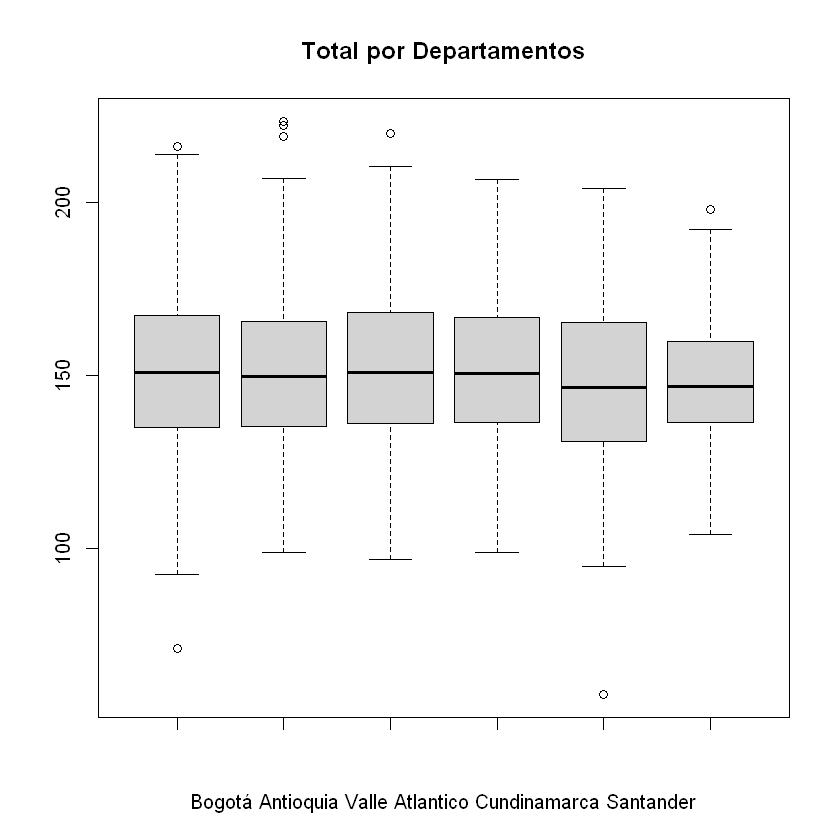

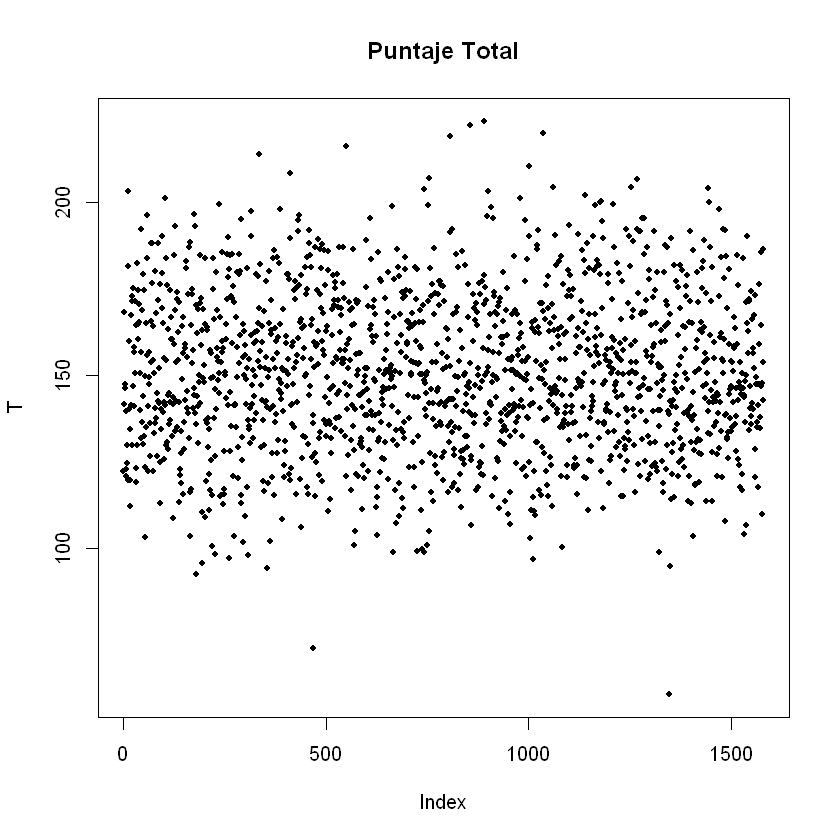

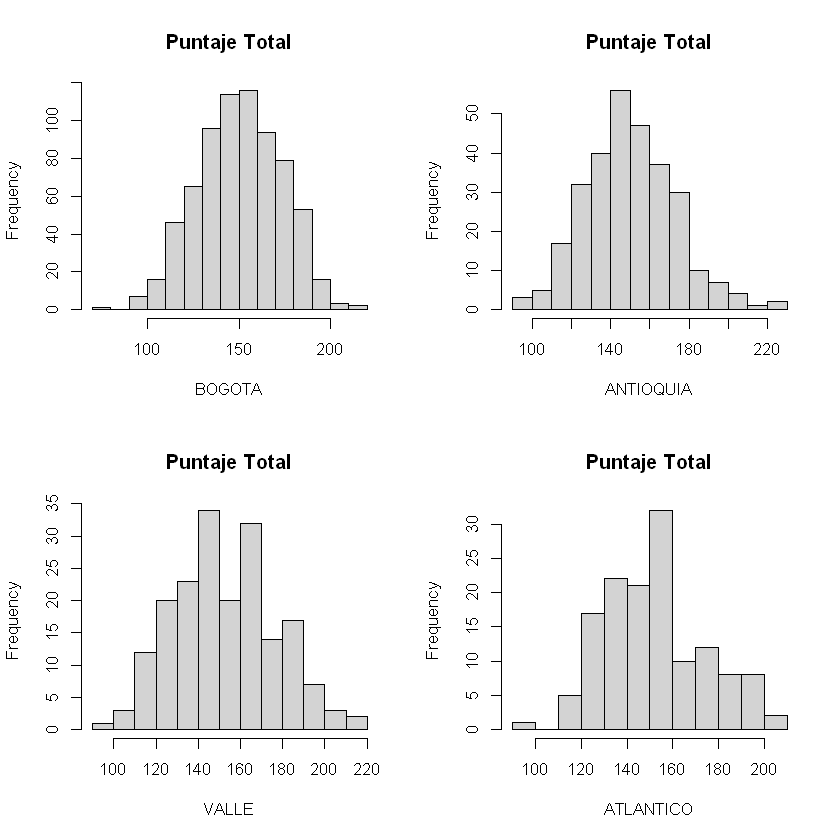

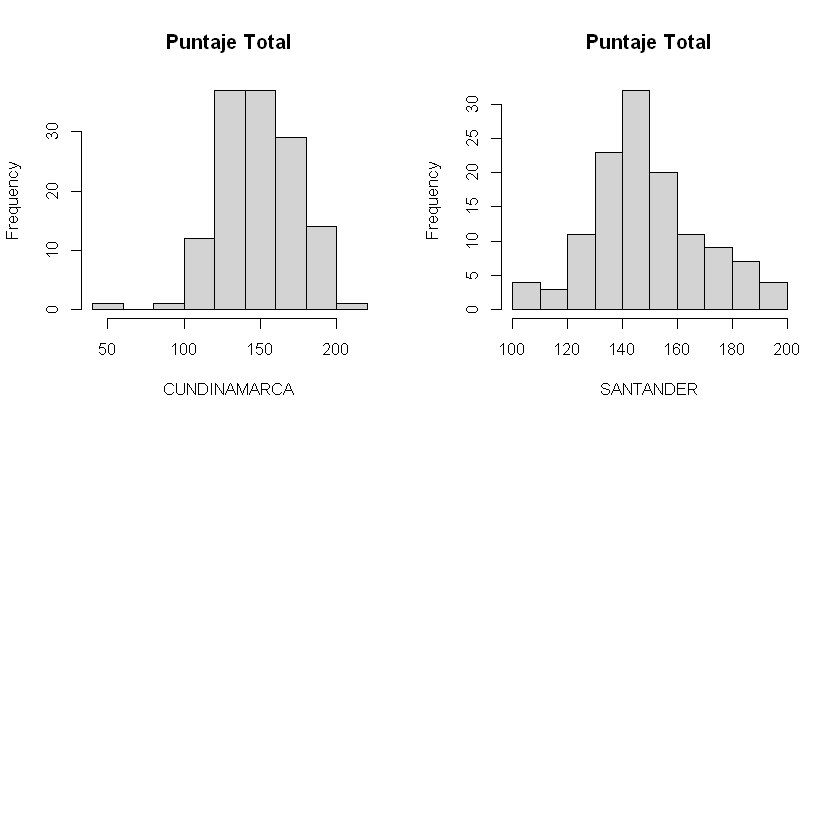

In [25]:
par(mfrow=c(1,1))
with(PT[mCong100,], boxplot(PT[mBOGOTA,]$T,
                          PT[mANTIOQUIA,]$T,
                          PT[mVALLE,]$T,
                          PT[mATLANTICO,]$T,
                          PT[mCUNDINAMARCA,]$T,
                          PT[mSANTANDER,]$T,
                          main = 'Total por Departamentos',
                          xlab='Bogotá Antioquia Valle Atlantico Cundinamarca Santander'))

with(PT[mCong100,], plot(T, pch = 20, main = 'Puntaje Total'))

par(mfrow=c(2,2))
with(PT[mCong100,], hist(PT[mBOGOTA,]$T, main = 'Puntaje Total',xlab="BOGOTA"))
with(PT[mCong100,], hist(PT[mANTIOQUIA,]$T, main = 'Puntaje Total',xlab="ANTIOQUIA"))
with(PT[mCong100,], hist(PT[mVALLE,]$T, main = 'Puntaje Total',xlab="VALLE"))
with(PT[mCong100,], hist(PT[mATLANTICO,]$T, main = 'Puntaje Total',xlab="ATLANTICO"))
with(PT[mCong100,], hist(PT[mCUNDINAMARCA,]$T, main = 'Puntaje Total',xlab="CUNDINAMARCA"))
with(PT[mCong100,], hist(PT[mSANTANDER,]$T, main = 'Puntaje Total',xlab="SANTANDER"))

### Inferencia

Siendo el muestreo por conglomerado una técnica para usar cuando hay agrupamientos "naturales", lo utilizaremos en este caso para hacer referencia a un lugar geográfico(el departamento) diferensiandose así del muestreo estratificado que vendría siendo por estratos o por así decirlo algo más específico, pero en general son muy parecidos entre sí.

<h1>4- Muestreo Sistematico</h1>

En primer lugar, debemos tener claro que el muestro sistemático parte de un número aleatorio i y los elementos que integran la muestra son los que ocupa los lugares i,i+k,i+2k,i+3k,...,i+(n-1)k. El riesgo de este tipo de muestreo está en los casos en que se dan periodicidades en la población, ya que al elegir a los miembros de la muestra con una periodicidad constante (k) podemos introducir una homogeneidad que no se da en la población. En este caso en concreto los datos están ordenados por periodos, siendo que los primeros datos del data set son del 2016, los de en medio 2017 y los del final 2018. Esto nos indica que la aleatoriedad no nos asegurará una distribución homogénea y por el contrario la sistemática sí recorrerá el data set de a pasos enteros asegurando números homogéneos.


In [26]:
msys1581<- sys.sample(N=nrow(PT),n=1581)
head(msys1581)

[1]  239  697 1155 1613 2071 2529

In [27]:
msys1581<- PT[msys1581, ]
head(msys1581)
dim(msys1581)

,C,T,RC,LC,CC,I,CE,P,D
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>
239,11,124.0,123,115,98,122,162,20163,BOGOTA
697,25,154.6,153,169,185,139,127,20163,CUNDINAMARCA
1155,41,164.6,180,172,170,141,160,20163,HUILA
1613,20,144.8,111,143,172,168,130,20163,CESAR
2071,11,134.8,151,122,145,130,126,20163,BOGOTA
2529,23,153.8,176,144,152,135,162,20163,CORDOBA


[1] 1581    9

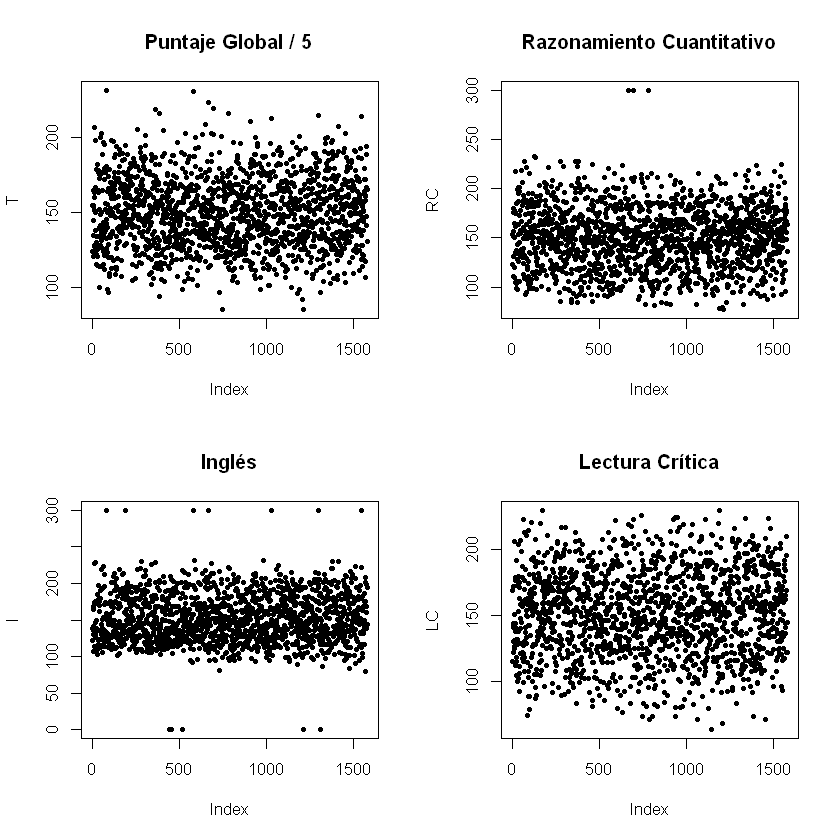

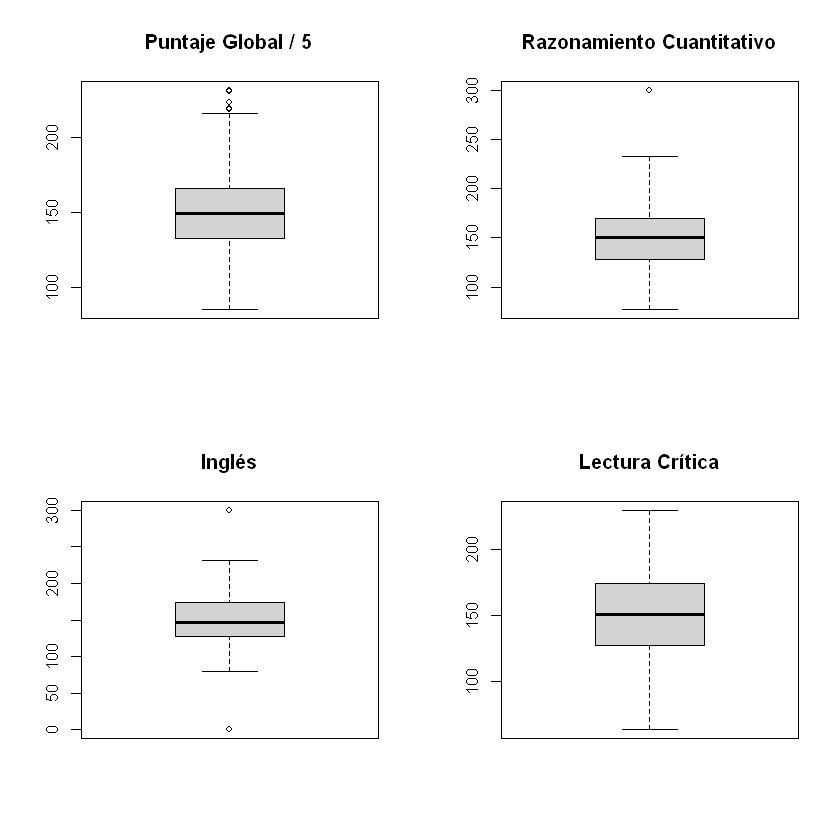

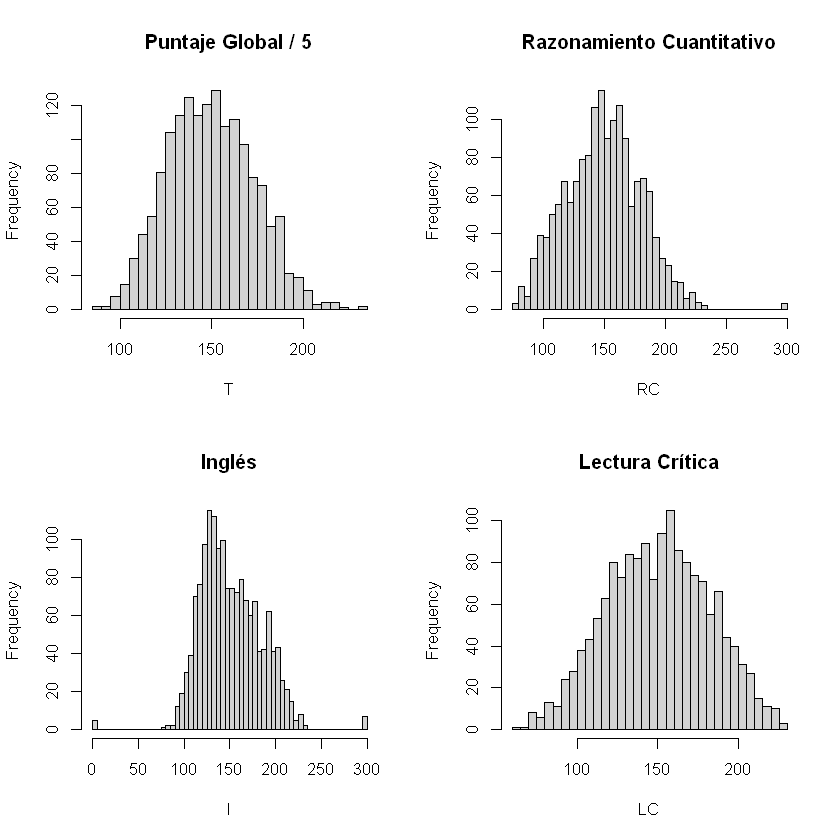

In [28]:
par(mfrow=c(2,2))

with(msys1581, plot(T, pch = 20, main = 'Puntaje Global / 5'))
with(msys1581, plot(RC, pch = 20, main = 'Razonamiento Cuantitativo'))
with(msys1581, plot(I, pch = 20, main = 'Inglés'))
with(msys1581, plot(LC, pch = 20, main = 'Lectura Crítica'))

with(msys1581, boxplot(T, main = 'Puntaje Global / 5'))
with(msys1581, boxplot(RC, main = 'Razonamiento Cuantitativo'))
with(msys1581, boxplot(I, main = 'Inglés'))
with(msys1581, boxplot(LC, main = 'Lectura Crítica'))

with(msys1581, hist(T, nclass = 50, main = 'Puntaje Global / 5'))
with(msys1581, hist(RC, nclass = 50, main = 'Razonamiento Cuantitativo'))
with(msys1581, hist(I, nclass = 50, main = 'Inglés'))
with(msys1581, hist(LC, nclass = 50, main = 'Lectura Crítica'))
par(mfrow=c(1,1))

### Inferencia

 Se considera necesario realizar el muestreo sistemático puesto que los datos están organizados por periodo de la realización del examen. Aplicando este tipo de muestreo a los datos que se tienen, se garantiza obtener información de todos los periodos.

<h1>5- Estimaciones</h1>

In [29]:
estimacion=PT$T

In [30]:
funcion_estimaciones <- function(x,propor_p, na.omit=FALSE){
    
    if (na.omit)
        x <- x[!is.na(x)]
    
    tamaño <- sample.size.prop(e=0.05, P = 0.5, N = length(x), level = propor_p)$n 
    muestra <- sample(1:length(x), size = tamaño, replace = FALSE)
    
    valores <- x[muestra]
    varianza = round(popvar(valores),2)
    media = round(mean(valores),2)
    
    return(c("media"=media,"varianza" = varianza))
}

In [31]:
estimacion_90 = funcion_estimaciones(estimacion, 0.9)
estimacion_95 = funcion_estimaciones(estimacion, 0.95)
estimacion_99 = funcion_estimaciones(estimacion, 0.99)
real = c(round(mean(estimacion),2),round(popvar(estimacion),2))


comparativa <- data.frame(real, estimacion_90, estimacion_95, estimacion_99)
comparativa

,real,estimacion_90,estimacion_95,estimacion_99
,<dbl>,<dbl>,<dbl>,<dbl>
media,148.99,152.61,151.97,149.7
varianza,528.33,599.92,551.03,550.3


<h5>Calculamos los intervalos de confianza </h5>

In [34]:

funcion_intervalo <- function(variable,valordeZ){
min_x = min(variable)
max_x = max(variable)
std_x = sd(variable)
        
media <- mean(na.omit(variable)) # Pedimos la media
desv <- sd(na.omit(variable)) # La desviación estándar
N <- length(na.omit(variable)) # El tamaño válido de la muestra
error.est <- desv/sqrt(N) # Calculamos el error estándar
    
error <- valordeZ*error.est 
lim.inf <- media-error # Límite inferior del intervalo
lim.sup <- media+error # Límite superior del intervalo
return(c("limite superior" = lim.sup, "limite inferior"= lim.inf))
    
}


In [35]:
# Valores de Z para 90%,95% y 99% correspondientemente 
Z_1 = 1.64
Z_2 = 1.96
Z_3 = 2.57


# se hace uso de la funcion y calcular los intervalos para cada uno
intervalo_confianza_90 <- funcion_intervalo(estimacion, Z_1)
intervalo_confianza_95 <- funcion_intervalo(estimacion, Z_2)
intervalo_confianza_99 <- funcion_intervalo(estimacion, Z_3)



# Guardamos todos los datos generados en un objeto data frame
resultado <- data.frame(intervalo_confianza_90,intervalo_confianza_95,intervalo_confianza_99)
resultado

,intervalo_confianza_90,intervalo_confianza_95,intervalo_confianza_99
,<dbl>,<dbl>,<dbl>
limite superior,149.0337,149.0423,149.0588
limite inferior,148.9451,148.9365,148.9200
